# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [4]:
# Libraries
import pandas as pd

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [5]:
employees= pd.read_csv("Employee.csv")
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [7]:
# Method 1
employees.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [35]:
employees['Title']

0      analyst
1      analyst
2      analyst
3      analyst
4    associate
5    associate
6           VP
7    associate
8           VP
Name: Title, dtype: object

In [33]:
# Method 2
employees[['Department','Salary']].pivot_table(index='Department', values='Salary', aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [37]:
employees[['Department','Title', 'Salary']].pivot_table(index='Department', columns='Title', values='Salary', aggfunc='mean')

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [39]:
employees[['Title', 'Salary', 'Years']].pivot_table(index='Title', values=['Salary', 'Years'], aggfunc='mean')

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [49]:
employees[['Department', 'Title', 'Salary']].pivot_table(index=['Department', 'Title'], aggfunc=[len, 'mean'])

len   mean
                     Salary Salary
Department Title                  
HR         VP             1   70.0
           analyst        2   32.5
IT         VP             1   70.0
           analyst        2   32.5
           associate      1   60.0
Sales      associate      2   55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [57]:
import numpy as np 
df2=pd.DataFrame(employees[['Department', 'Title', 'Salary']].pivot_table(index=['Department', 'Title'], values = 'Salary', aggfunc=[len, np.median, np.min, np.max, np.std]))
df2


len median   amin   amax       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP             1   70.0     70     70       NaN
           analyst        2   32.5     30     35  3.535534
IT         VP             1   70.0     70     70       NaN
           analyst        2   32.5     30     35  3.535534
           associate      1   60.0     60     60       NaN
Sales      associate      2   55.0     55     55  0.000000

In [ ]:
#VPs are better paid than associates who are better paid than analysts 
# there is a relatively important difference in analyst salaries (3.5 std dev on a median of 32.5) 
# The IT associate is better paid than the sales associates 
# there are very few people 

#### Based on your comments, fill the missing values with an appropriate value.

In [65]:
df2.fillna(0)

len median   amin   amax       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP             1   70.0     70     70  0.000000
           analyst        2   32.5     30     35  3.535534
IT         VP             1   70.0     70     70  0.000000
           analyst        2   32.5     30     35  3.535534
           associate      1   60.0     60     60  0.000000
Sales      associate      2   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [66]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [69]:
employees[['Department', 'Title', 'Salary', 'Years']].pivot_table(index=['Department', 'Title'], aggfunc={'Salary':'mean','Years':'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [109]:
def meanWnotmax(x):
        return x.sort_values()[:-1].mean()

#meanWnotmax([1,3,7,7])
#abc = employees['Salary']
#meanWnotmax(abc)
#meanWnotmax(employees['Salary'])

pd.pivot_table(employees, index='Department', values= 'Salary', aggfunc=meanWnotmax)


,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [110]:
fitbit= pd.read_csv("Fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [112]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [114]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [117]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'], method='pearson', min_periods=None)

0.5714518481062606

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [118]:
import matplotlib.pyplot as plt;

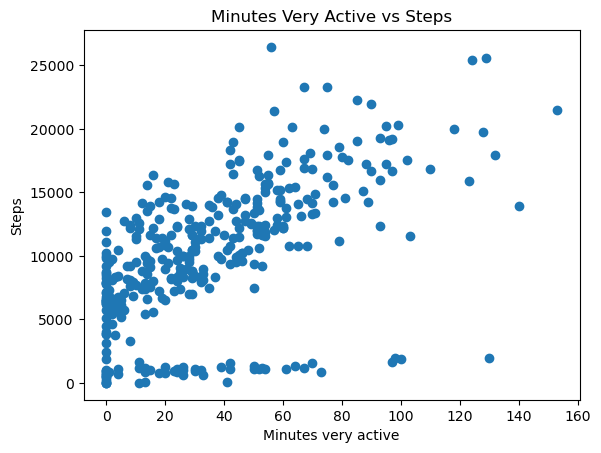

In [119]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title("Minutes Very Active vs Steps")
plt.xlabel("Minutes very active")
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
# There seems to be a correlation between them, but it is not perfect, namely because there are weird data points 
# that represent days where the person took 0 steps but had a lot of time identified as "very active", 
# and the opposite (more than 12000 steps while there are 0 minutes in the day declared as "very active")

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [122]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'], method='pearson', min_periods=None)

0.07690608062990097

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

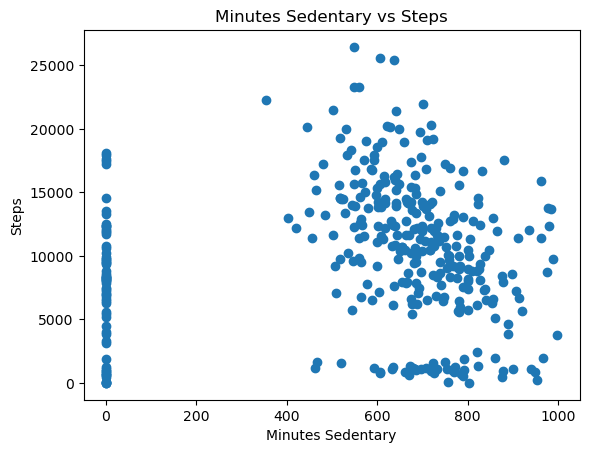

In [124]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title("Minutes Sedentary vs Steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
The correlation seems very low - which  is reflected by a low corr coefficient. 
There seem to be three types of days : 
the ones where there are very few minutes sedentary, and where the steps can range from 0 to almost 20 000 (not entirely logical)
the ones where minutes sedentary are very high and steps are very low (logical data points)
and the ones (the majority) where minutes sedentary are quite high but steps can range from 5000 to more than 20 000 steps.
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [125]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'], method='pearson', min_periods=None)

0.13098565950836388

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

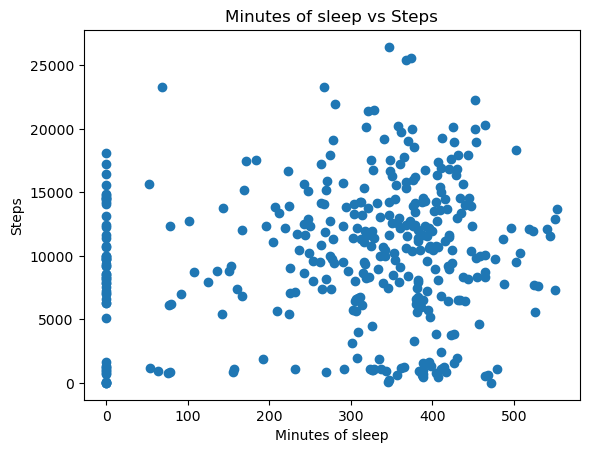

In [127]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title("Minutes of sleep vs Steps")
plt.xlabel("Minutes of sleep")
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
Again no real correlation here. 
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [131]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
fitbit[columns]

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [140]:
fitbit[columns].corr(method='pearson').sort_values("Steps")

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
#The feature with the highest correlation to the variable steps is steps. 
# just kidding
# the feature with the highest correlation to the variable steps is "minutes very active". 
# All the other ones don't have strong correlation coefficients 

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [169]:
time_grades= pd.read_csv("Time_Grades.csv")
time_grades.sort_values('Study time')

,Name,Study time,Grade
12,Jonathan,2,1
14,Pilar,3,2
0,Jose,4,4
5,Eva,5,3
7,Pedro,6,5
9,Gervasio,7,3
10,Gemma,7,8
2,David,8,9
1,Maria,9,7
3,Sonia,10,7


In [157]:
time_grades.groupby('Study time')['Grade'].mean()

Study time
2     1.0
3     2.0
4     4.0
5     3.0
6     5.0
7     5.5
8     9.0
9     7.0
10    7.0
11    7.0
12    7.0
13    8.0
18    9.0
20    9.0
Name: Grade, dtype: float64

In [189]:
gradesbytime=pd.DataFrame(time_grades[['Study time','Grade']].pivot_table(index=['Study time','Grade'], aggfunc=len)).reset_index()
gradesbytime.columns=['Study time', 'Grade', 'Frequency']
gradesbytime

,Study time,Grade,Frequency
0,2,1,1
1,3,2,1
2,4,4,1
3,5,3,1
4,6,5,1
5,7,3,1
6,7,8,1
7,8,9,1
8,9,7,1
9,10,7,1


#### Show visually the frequency distribution of the `time_grades` dataset.

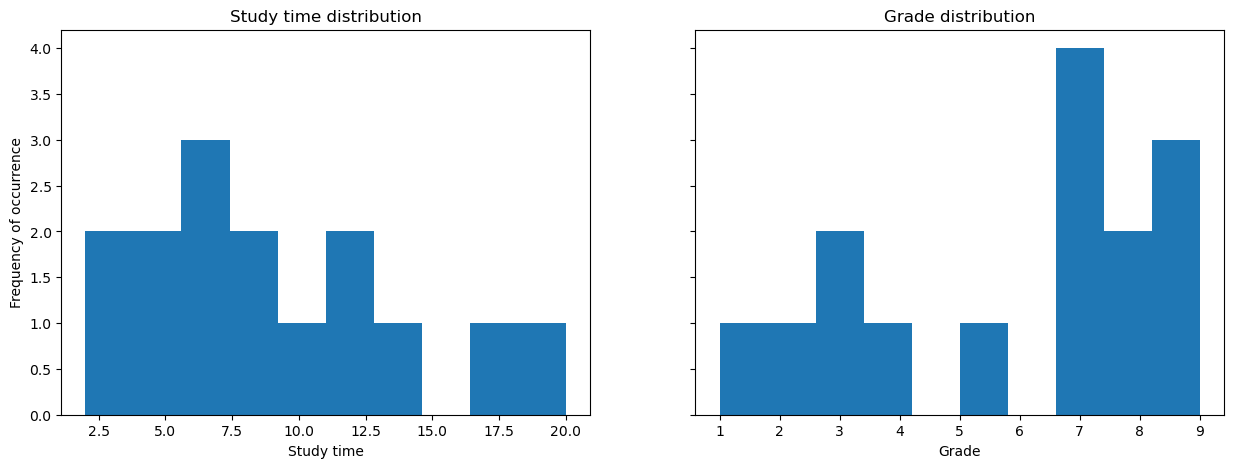

In [219]:
fig, (ax1, ax2 ) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,5))

ax1.set(title="Study time distribution", xlabel="Study time")
ax1.set_ylabel("Frequency of occurrence")
ax1.hist(gradesbytime['Study time'])

ax2.set(title="Grade distribution", xlabel="Grade")
ax2.hist(gradesbytime['Grade'])

plt.show()

In [ ]:
#plt.hist(gradesbytime['Study time'])
#plt.show()
#plt.hist(gradesbytime['Grade'])
#plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [195]:
time_grades['Grade'].corr(time_grades['Study time'], method='pearson', min_periods=None)

0.7980456073578858

In [196]:
time_grades['Grade'].corr(time_grades['Study time'], method='spearman', min_periods=None)

0.819658753036942

PEARSON - LINEAR RELATIONSHIP - In statistics, the Pearson correlation coefficient also referred to as Pearson’s r or the bivariate correlation is a statistic that measures the linear correlation between two variables X and Y. It has a value between +1 and −1. A value of +1 is a total positive linear correlation, 0 is no linear correlation, and −1 is a total negative linear correlation. The Pearson correlation can evaluate ONLY a linear relationship between two continuous variables (A relationship is linear only when a change in one variable is associated with a proportional change in the other variable)

SPEARMAN - MONOTONIC (or non-linear) In statistics, Spearman’s rank correlation coefficient or Spearman’s ρ, named after Charles Spearman is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

*A monotonic relationship is a relationship that does one of the following:
(1) as the value of one variable increases, so does the value of the other variable, OR,
(2) as the value of one variable increases, the other variable value decreases.
BUT, not exactly at a constant rate whereas in a linear relationship the rate of increase/decrease is constant.*

Source : https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8

In [ ]:
"""
There seems to be a stronger relationship when we are using the spearman method
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

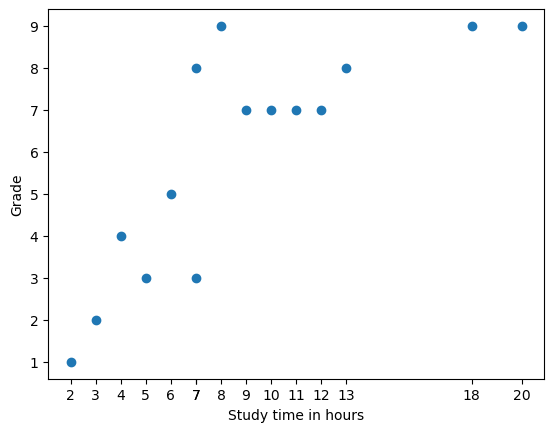

In [215]:
plt.scatter(gradesbytime['Study time'], gradesbytime['Grade'])
plt.xlabel("Study time in hours")
plt.xticks(ticks = gradesbytime["Study time"], labels= gradesbytime["Study time"])
plt.ylabel("Grade")
plt.show()

In [ ]:
"""
Yes, there is a correlation between time spent studying and grades
However it's not a perfect correlation. 
There are some "marginal value floors" (not sure of the right vocabulary)
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
The Spearman correlation is higher in this case because the correlation is not linear (there are these "floors")
"""